# The Perceptron Algorithm

A Perceptron is a system that learns using labeled examples of feature vectors, mapping these inputs to their corresponding output class labels. In its simplest form, a Perceptron contains N input nodes, one for each entry in the input row, followed by only one layer in the network with just a single node in that layer.

Training a Perceptron is a fairly straightforward operation. Our goal is to obtain a set of weights *w* that accurately classifies each instance in our training set. In order to train our Perceptron, we iteratively feed the network our training data multiple times. Each time the network has seen the full set of training data, we say an epoch has passed. It normally takes many epochs until a weight vector _w_ can be learned to linearly separate our two classes of data.

![Perceptron](https://drive.google.com/uc?id=1K7olbB11mSfAwPmB8BeeRNe6XbuGSK4D)

The pseudocode is the following:
1. Initialize our weight vector w with small random values
2. Until Perceptron converges
    1. Loop over each input and class label
    2. Take $x$ and pass it through the network, calculating the output value: $y = (w · x)$
    3. Update the weights: if ŷ = 0 --> $w_i = w_i + \alpha x_i$, if ŷ = 1 --> $w_i = w_i - \alpha x_i$
        

In [59]:
import random, math
import numpy as np
import matplotlib.pyplot as plt

In [60]:
class Perceptron:        
    """Perceptron class

        Args:
            M: Number of inputs
            alpha: Learning rate
        
        Attributes:
            W: The weights for the perceptron
            b: bias
            alpha: The learning rate
    """
    def __init__(self, N, M, alpha=0.1):        
        # Creates an array of N weights and initializes with random values
        # define iputs
        self.M=M
        self.W = (np.random.random(N))
        self.b = (np.random.random(1))
        self.alpha=alpha
        print("<--------------------------------------------------------------------->")
        print("Imprimienndo bios")
        print(self.b)
        #print("Imprimiendo weights")
        #print(self.W)
        print("<--------------------------------------------------------------------->")

            
    def sigmoid(self, x):
        #TO DO: Apply the sigmoid function
        s=1/(1+np.exp(-x))
        return s

    def error(self, y, yhat):
        e=(1-y)*(np.log(1-yhat))+y*(np.log(yhat))
        return e
    
    def predict(self, x):
        """
            Makes a prediction for the specified input
            
            Args:
                x: Input to make a prediction on.
        """
        y_hat=self.sigmoid(self.W[0]*x[0]+self.W[1]*x[1]+self.b[0])    
        #TO DO: Define the predict function
        return y_hat
    
    
    def train(self, X, y, epochs):
        self.epochs=epochs
        dW1=0
        dW2=0
        dbias=0
        y_hat=[0]*self.M
        self.errorLista=list()
        e1=0
        for epoch in range(epochs):
            e=0
            for i in range(self.M):
                yhat=self.predict(X[i])
                e+=self.error(y[i],yhat)
                dy=yhat-y[i]
                dW1+=dy*X[i][0]
                dW2+=dy*X[i][1]
                dbias+=dy
                y_hat[i]=yhat
            self.W[0]+=(-dW1/self.M)*self.alpha
            self.W[1]+=(-dW2/self.M)*self.alpha
            self.b+=(-dbias/self.M)*self.alpha
            e1=(-1/self.M)*e
            self.errorLista.append(e1)
        #print("Imprimiendo lista calculo y_hat")
        #print(y_hat)
    
    def graphs(self):
        plt.plot(self.errorLista)
                

Entrenando Perceptron con OR

Entrenando perceptron con OR
<--------------------------------------------------------------------->
Imprimienndo bios
[0.92661385]
<--------------------------------------------------------------------->
Initial weights OR [0.25505067 0.81726025]
<--------------------------------------------------------------------->
<--------------------------------------------------------------------->
Weights after training OR [81.24207535 75.05541634]
<--------------------------------------------------------------------->
Resultados OR
[0][0]---> 5.44362549674043e-16
[0][1]---> 1.0
[1][0]---> 1.0
[1][1]---> 1.0
Terminando entrenamiento
Graficando error


C:\Users\felip\AppData\Local\Temp\ipykernel_10928\2670664962.py:34: RuntimeWarning: divide by zero encountered in log
  e=(1-y)*(np.log(1-yhat))+y*(np.log(yhat))
C:\Users\felip\AppData\Local\Temp\ipykernel_10928\2670664962.py:34: RuntimeWarning: invalid value encountered in double_scalars
  e=(1-y)*(np.log(1-yhat))+y*(np.log(yhat))


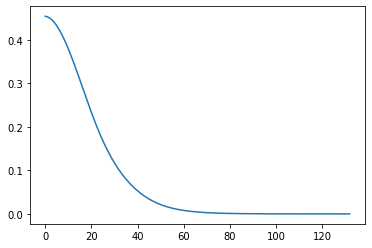

In [61]:
# change the seed to see different solutions
random.seed(42)

# The following data is used to train the perceptron for the OR operation
# Test your code with the OR operation
X = [[0,0],[0,1], [1,0], [1,1]]
y = [0,1, 1, 1]
print("Entrenando perceptron con OR")
pOR = Perceptron(2,4)
print(f"Initial weights OR {pOR.W}")
print("<--------------------------------------------------------------------->")
pOR.train(X, y, 400)
print("<--------------------------------------------------------------------->")
print(f"Weights after training OR {pOR.W}")
print("<--------------------------------------------------------------------->")
print("Resultados OR")
prediction1 = pOR.predict([0,0]) 
prediction2 = pOR.predict([0,1]) 
prediction3 = pOR.predict([1,0]) 
prediction4 = pOR.predict([1,1]) 
print("[0][0]--->", prediction1)
print("[0][1]--->", prediction2)
print("[1][0]--->", prediction3)
print("[1][1]--->", prediction4)
#print(prediction1, prediction2, prediction3, prediction4)
print("Terminando entrenamiento")
print("Graficando error")
pOR.graphs()




Entrenando perceptron con AND

Entrenando perceptron con AND
<--------------------------------------------------------------------->
Imprimienndo bios
[0.72213378]
<--------------------------------------------------------------------->
Initial weights AND [0.97487902 0.05613089]
<--------------------------------------------------------------------->
<--------------------------------------------------------------------->
Weights after training AND [71.50877831 65.38520382]
<--------------------------------------------------------------------->
Resultados AND
[0][0]---> 6.487681039844082e-37
[0][1]---> 1.6163027005566174e-08
[1][0]---> 7.378262719718974e-06
[1][1]---> 1.0
Terminando entrenamiento
Graficando error


C:\Users\felip\AppData\Local\Temp\ipykernel_10928\2670664962.py:34: RuntimeWarning: divide by zero encountered in log
  e=(1-y)*(np.log(1-yhat))+y*(np.log(yhat))
C:\Users\felip\AppData\Local\Temp\ipykernel_10928\2670664962.py:34: RuntimeWarning: invalid value encountered in double_scalars
  e=(1-y)*(np.log(1-yhat))+y*(np.log(yhat))


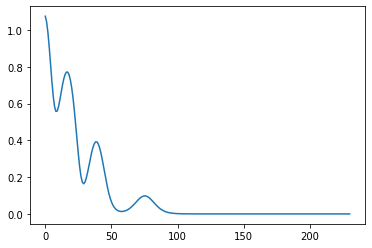

In [62]:
# The following data is used to train the perceptron for the AND operation
# Test your code with the OR operation
#X = [[0,0],[0,1], [1,0], [1,1]]
y = [0,0, 0, 1]
print("Entrenando perceptron con AND")
pAND = Perceptron(2,4)
print(f"Initial weights AND {pAND.W}")
print("<--------------------------------------------------------------------->")
pAND.train(X, y, 300)
print("<--------------------------------------------------------------------->")
print(f"Weights after training AND {pAND.W}")
print("<--------------------------------------------------------------------->")
print("Resultados AND")
prediction1 = pAND.predict([0,0]) 
prediction2 = pAND.predict([0,1]) 
prediction3 = pAND.predict([1,0]) 
prediction4 = pAND.predict([1,1]) 
print("[0][0]--->", prediction1)
print("[0][1]--->", prediction2)
print("[1][0]--->", prediction3)
print("[1][1]--->", prediction4)
#print(prediction1, prediction2, prediction3, prediction4)
print("Terminando entrenamiento")
print("Graficando error")
pAND.graphs()